# Construção de feixes elementares

Ademais à construção de campos ópticos genéricos, alguns feixes possuem construtores implementados no módulo `optical.beam`. Novamente aqui faremos primeiramente algumas pré-definições para a execução das células de código.

In [1]:
# retornar sem mensagens (-q = quiet) ao diretório raíz
%cd -q ../../

# importa o módulo beam dessa biblioteca
import optical.beam as beam
# módulo numpy: utilizado na construção e controle de matrizes
import numpy as np
# módulo plotly: utilizado na construção de gráficos
from plotly import graph_objects as go

# construção da região simulada do espaço
x = np.linspace(-40.0, +40.0, 500); # pontos da partição do eixo x
y = np.linspace(-40.0, +40.0, 500); # pontos da partição do eixo y

X, Y = np.meshgrid(x, y);           # malha de pontos do plano X, Y

# definição dos layouts dos gráficos
intensityLayout = go.Layout(
    title = 'Intensidade',
    title_x = 0.5,                  # texto centralizado na horizontal
    xaxis = dict(title = 'x(μm)'),  # legenda do eixo x
    yaxis = dict(title = 'y(μm)'),  # legenda do eixo y
    width = 850,                    # comprimento da imagem
    height = 800                    # altura da imagem
);
phaseLayout = go.Layout(
    title = 'Fase',
    title_x = 0.5,                  # texto centralizado na horizontal
    xaxis = dict(title = 'x(μm)'),  # legenda do eixo x
    yaxis = dict(title = 'y(μm)'),  # legenda do eixo y
    width = 850,                    # comprimento da imagem
    height = 800                    # altura da imagem
);

## Feixes gaussianos

Um feixe gaussiano possui, para $z = 0$, uma envoltória da forma:

$$
    U_{w_0}(x, y) = \operatorname{exp}\left(-\frac{x^2 + y^2}{w_0^2}\right)
$$

assim para construí-los não precisamos informar a envoltória do campo, sendo necessário apenas informar o parâmetro `w0` = $w_0$ que corresponde à cintura do feixe.

In [2]:
# criação de um feixe gaussiano
gaussian = beam.createG(
    w0 = 10.0,
    region = (X, Y)
);

### Perfil transversal de intensidade

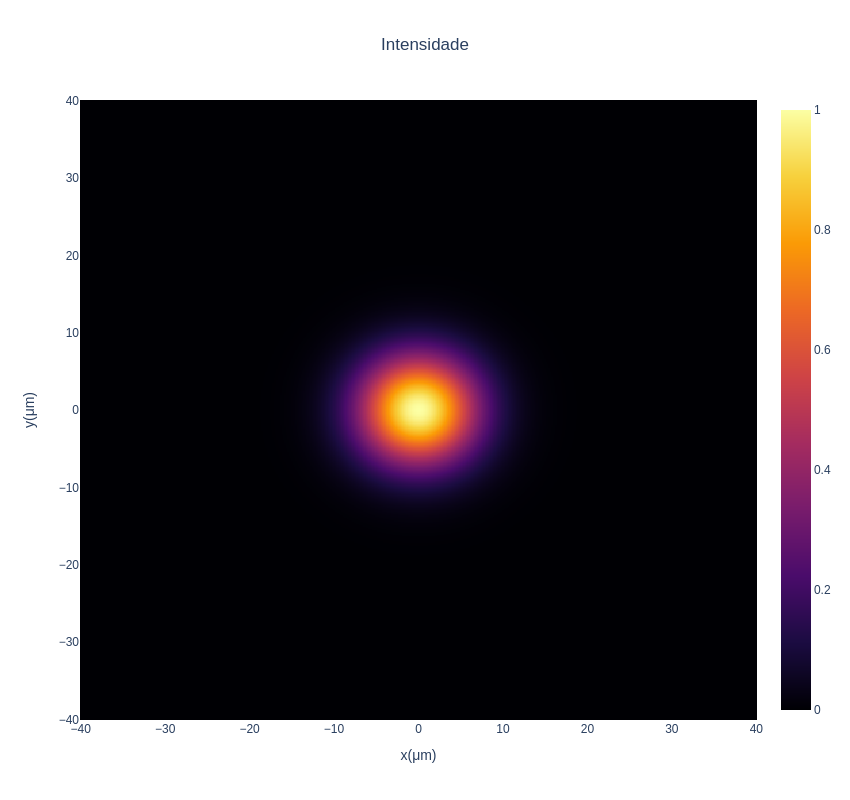

In [3]:
# criação da figura com um gráfico Heatmap da intensidade
intensityGraph = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.abs(gaussian) ** 2,
        colorscale = 'inferno'
    ),
    layout = intensityLayout
);

intensityGraph.show("png");             # mostrar gráfico de intensidades

### Perfil transversal de fase

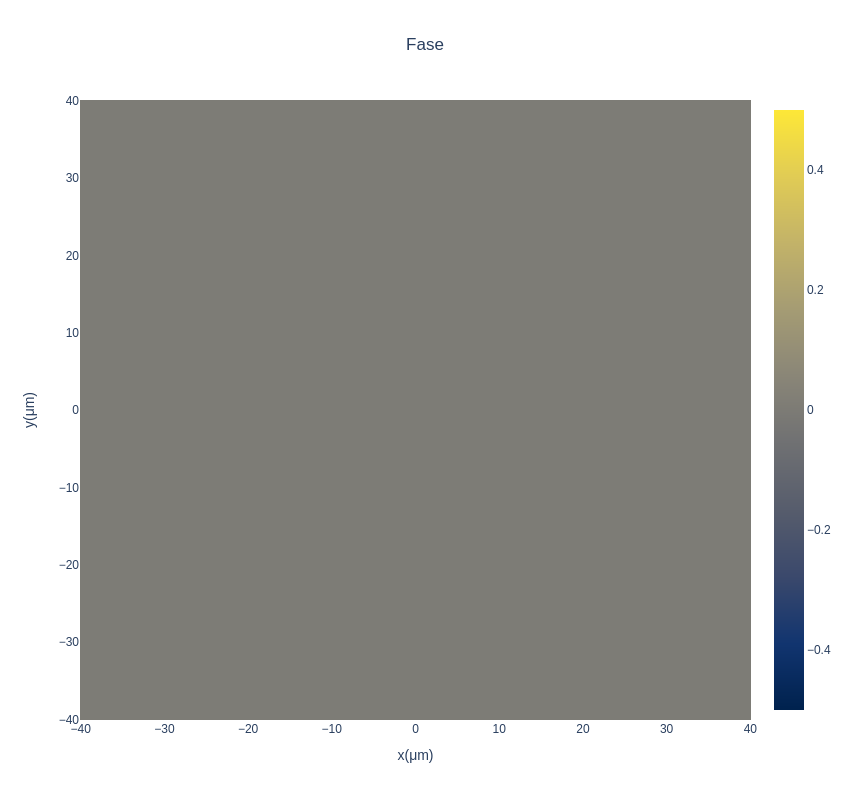

In [4]:
# criação da figura com um gráfico Heatmap da fase
phaseGraph = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.angle(gaussian),
        colorscale = 'cividis'
    ),
    layout = phaseLayout
);

phaseGraph.show("png");             # mostrar gráfico de fases

## Feixes Hermite-Gauss

Um feixe hermite-gauss possui, para $z = 0$, uma envoltória da forma:

$$
    U_{w_0,l,m}(x, y) = \mathrm{G}_l\left(\frac{\sqrt{2}x}{w_0}\right)\mathrm{G}_m\left(\frac{\sqrt{2}y}{w_0}\right)
$$

onde $\mathrm{G}_i(u) = \mathcal{H}_i(u)\operatorname{exp}\left(-\frac{1}{2}u^2\right)$ com $\mathcal{H}_i$ sendo o polinômio de Hermite. Assim para construí-los não precisamos informar a envoltória do campo, sendo necessário apenas informar os parâmetros `w0` = $w_0$ que corresponde à cintura do feixe, e o par de índices `indices` = $(l,m)$ que são os índices dos polinômios de Hermite para os eixos x e y.

In [5]:
# criação de um feixe hermite-gauss
hermite_gauss = beam.createHG(
    w0 = 10.0,
    indices= (1, 2),
    region = (X, Y)
);

### Perfil transversal de intensidade

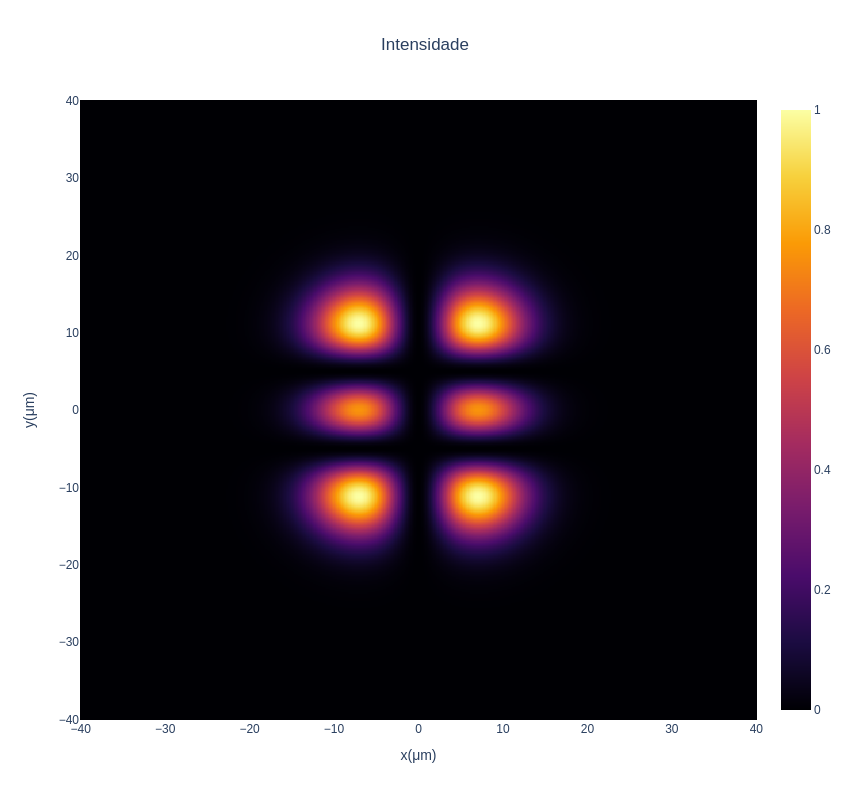

In [6]:
# criação da figura com um gráfico Heatmap da intensidade
intensityGraph = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.abs(hermite_gauss) ** 2,
        colorscale = 'inferno'
    ),
    layout = intensityLayout
);

intensityGraph.show("png");             # mostrar gráfico de intensidades

### Perfil transversal de fase

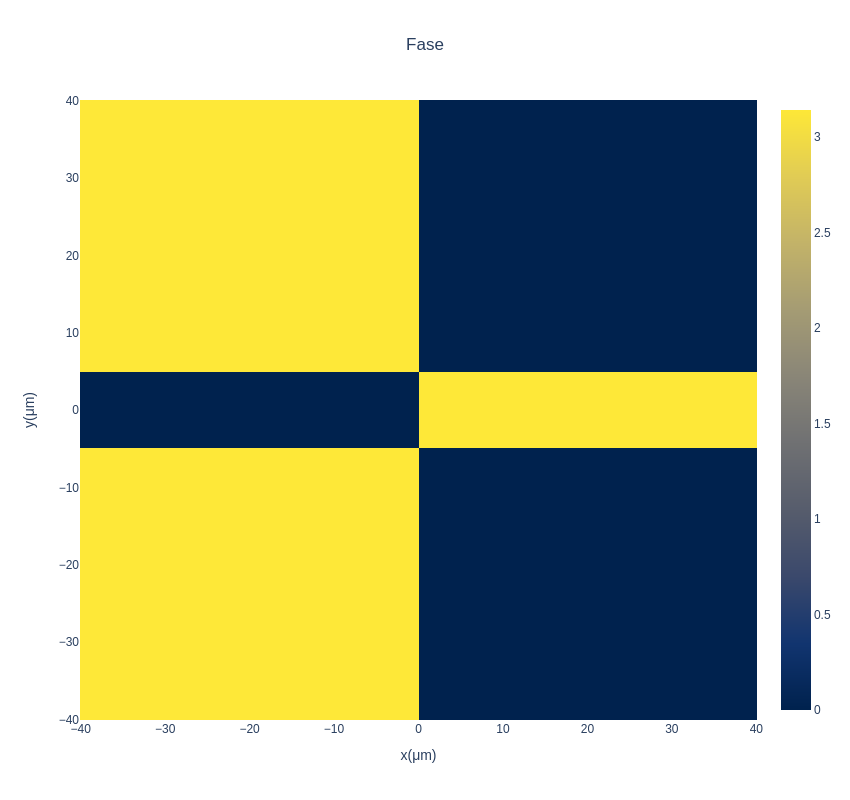

In [7]:
# criação da figura com um gráfico Heatmap da fase
phaseGraph = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.angle(hermite_gauss),
        colorscale = 'cividis'
    ),
    layout = phaseLayout
);

phaseGraph.show("png");             # mostrar gráfico de fases

## Feixes Laguerre-Gauss

Um feixe laguerre-gauss possui, para $z = 0$, uma envoltória da forma:

$$
    U_{w_0,l,m}(\rho, \phi) = \left(\frac{\rho}{w_0}\right)^l\mathrm{L}^l_m\left(\frac{2\rho^2}{w_0^2}\right)\operatorname{exp}\left(-\frac{\rho^2}{w_0^2}\right)
$$

com $\mathrm{L}^l_m(u) sendo o polinômio generalizado de Laguerre. Assim para construí-los não precisamos informar a envoltória do campo, sendo necessário apenas informar os parâmetros `w0` = $w_0$ que corresponde à cintura do feixe, e o par de índices `indices` = $(l,m)$ que são, respectivamente, os índices azimutal e radial do feixe.

In [8]:
# criação de um feixe laguerre-gauss
laguerre_gauss = beam.createLG(
    w0 = 10.0,
    indices= (3, 2),
    region = (X, Y)
);

### Perfil transversal de intensidade

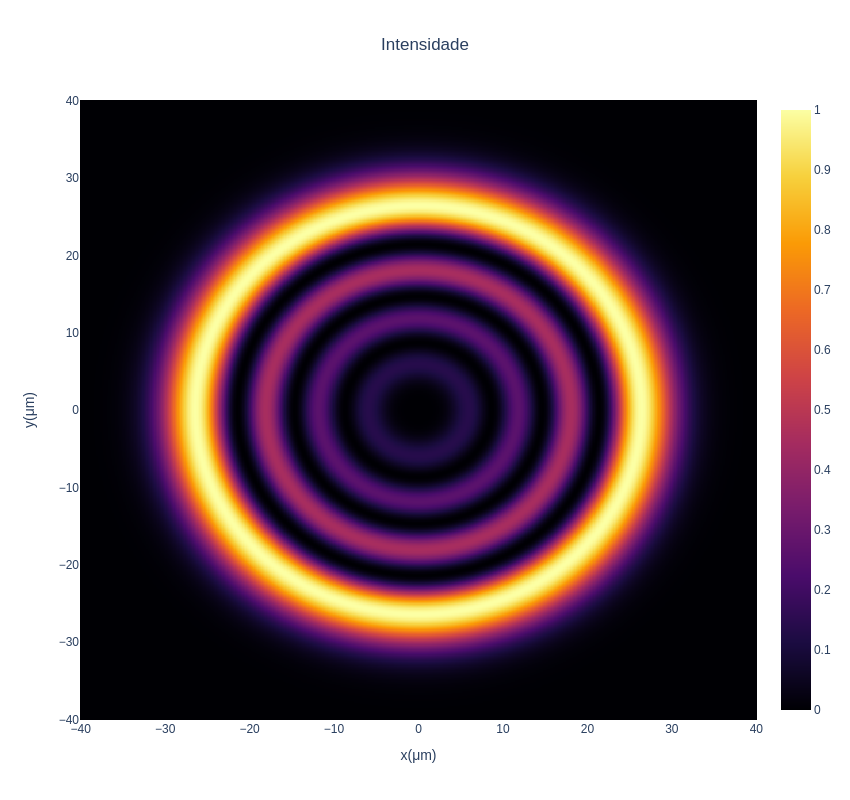

In [9]:
# criação da figura com um gráfico Heatmap da intensidade
intensityGraph = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.abs(laguerre_gauss) ** 2,
        colorscale = 'inferno'
    ),
    layout = intensityLayout
);

intensityGraph.show("png");             # mostrar gráfico de intensidades

### Perfil transversal de fase

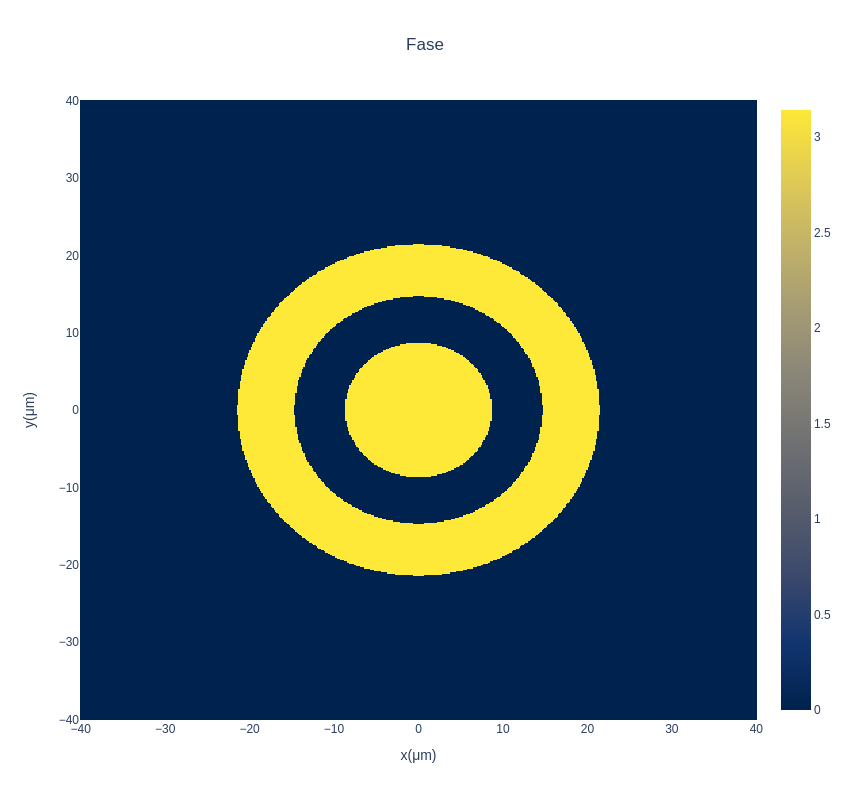

In [10]:
# criação da figura com um gráfico Heatmap da fase
phaseGraph = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.angle(laguerre_gauss),
        colorscale = 'cividis'
    ),
    layout = phaseLayout
);

phaseGraph.show("png");             # mostrar gráfico de fases

## Feixes Bessel

Um feixe bessel possui, para $z = 0$, uma envoltória da forma:

$$
    U_{k_t,m}(\rho, \phi) = \mathrm{J}_m\left(k_t\rho\right)\operatorname{exp}\left(\imath m \phi\right)
$$

com $\mathrm{J}_m(u)$ sendo a função de Bessel. Assim para construí-los não precisamos informar a envoltória do campo, sendo necessário apenas informar os parâmetros `k_t` = $k_t$, e o índice `m` que corresponde à ordem da função de Bessel.

In [11]:
# criação de um feixe bessel
bessel = beam.createJ(
    k_t = 1.0,
    m = 2,
    region = (X, Y)
);

### Perfil transversal de intensidade

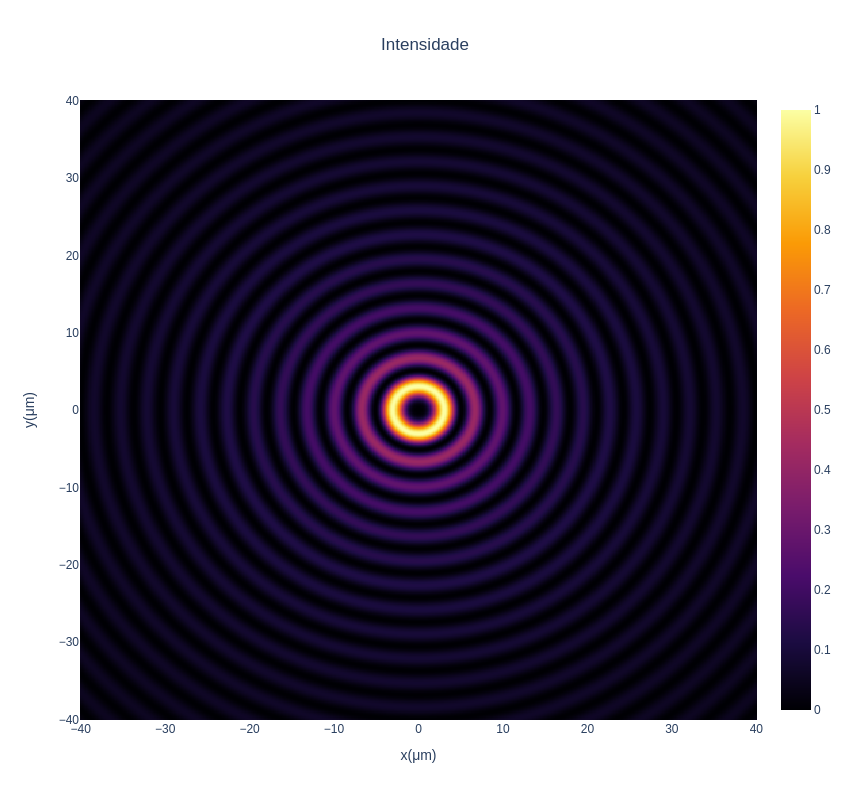

In [12]:
# criação da figura com um gráfico Heatmap da intensidade
intensityGraph = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.abs(bessel) ** 2,
        colorscale = 'inferno'
    ),
    layout = intensityLayout
);

intensityGraph.show("png");             # mostrar gráfico de intensidades

### Perfil transversal de fase

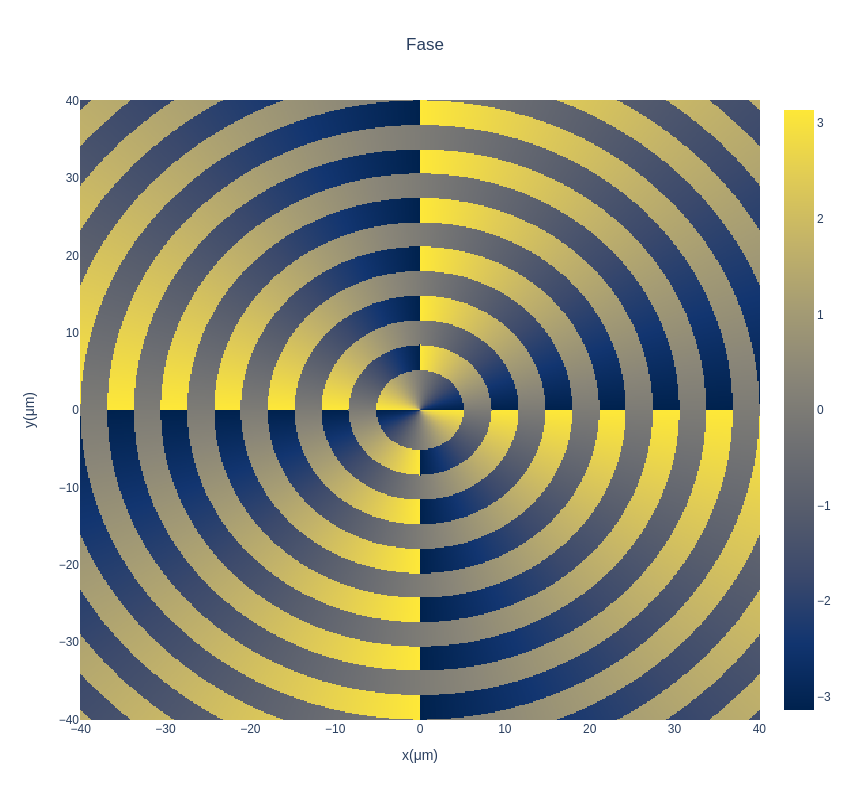

In [13]:
# criação da figura com um gráfico Heatmap da fase
phaseGraph = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.angle(bessel),
        colorscale = 'cividis'
    ),
    layout = phaseLayout
);

phaseGraph.show("png");             # mostrar gráfico de fases